In [1]:
import numpy as np
import math
import pandas as pd
#
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import random

##
mpl.rcParams.update(mpl.rcParamsDefault)
#plt.style.use('seaborn-dark')
#plt.rcParams["figure.figsize"] = (5,5)

import statistics

from IPython.display import display, Math

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

# Some functions used

In [3]:
# takes in a list with submists and returns elements

def concatenate(xs):
    total = []
    for i in xs:
        total += i
    return total

In [4]:
# Hist 2d function from HW:1

def histogram_2D(x, y, n = 10, c = None):
    h = plt.hist2d(x, y, bins=(n, n), range=np.array([(-1.1, 1.1), (-1.1, 1.1)]),cmap=plt.cm.rainbow)
    plt.title(c)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(h[3])
    plt.show()

In [5]:
# 1(a) - Plot scatter plot of x and y
def scatter_plot(x,y, c= "2d scatterplot of Y vs X"):
    plt.scatter(x,y,alpha=0.4)
    plt.title(c)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [6]:

# 1(d) - Plots 1 d histogram of scores

def histogram_1d(x, bins=None, name = None, xlabel = None):
    #tick_spacing = 1
    fig, ax = plt.subplots(1,1)
    ax.hist(x)
   # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlim([0, max(x)])
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of games")
    plt.show()


In [7]:
# Source: https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/
"""Wasn't sure if the stdev was n or n-1 so custom formula"""
def stdev(data, ddof=1):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / (n - ddof)
    stdev = np.sqrt(variance)
    return stdev

# <font color='blue'> 1(e): Monte Carlo: Theoretical Game of Shrinking Dark</font>


In [8]:
"""Define a class which plays 1 game of shrinking dartboard
Returns: scores, x and y coordinates hit by the dart in one game
"""
class dart_game_theoretical:
    
    def __init__(self):
        self.score = 1
        self.radius = 1
        self.x_list = []
        self.y_list = []
    
    def throw(self):
        while True:
            x, y = np.random.random(2) * 2 - 1 # x,y in [-1,1]
            distance = np.sqrt(x ** 2 + y ** 2)

            if distance > self.radius: # Game ends
                break
            
            self.score += 1
            self.radius = np.sqrt(self.radius ** 2 - distance ** 2) #radius resets to chord length
            self.x_list.append(x)
            self.y_list.append(y)
        return self.score, self.x_list, self.y_list

In [27]:
scores = [] 
xs,ys = [],[]

# Create 1000 game objects
while(len(scores)<1000):
    a = dart_game_theoretical()
    s, x, y = a.throw()
    scores.append(s)
    ys.append(y)
    xs.append(x)

In [28]:
set(scores)

{1, 2, 3, 4, 5, 6}

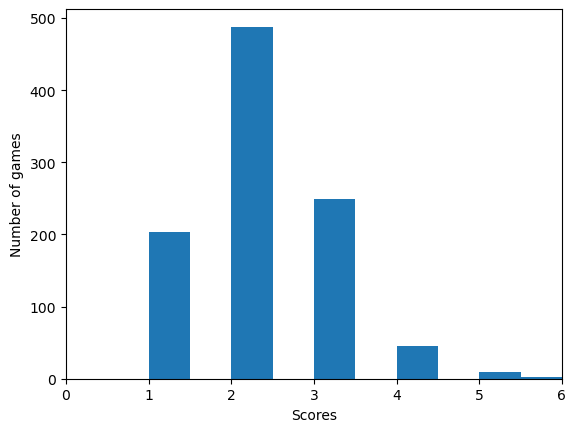

In [29]:
histogram_1d(scores, xlabel= "Scores")

### 1(f) Statistics from the given game

In [30]:
display(Math(r'Mean\:score,\; \mu = \: {0} \\ Std\:Deviation,\; \sigma: {1}'.
             format(statistics.mean(scores), round(stdev(scores),3))))

<IPython.core.display.Math object>

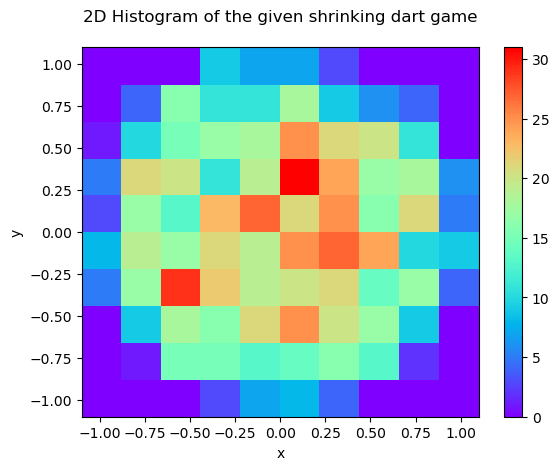

In [37]:
list_x, list_y = concatenate(xs), concatenate(ys)
histogram_2D(list_x, list_y, n = 10, c="2D Histogram of the given shrinking dart game\n")

# <font color='blue'> 1(g): Monte Carlo: Realisitic game of Shrinking Dart</font>

In [38]:
"""Define a class which plays 1 game of shrinking dartboard with uniformly in distance from the 
center out to dartboard radius r = 1, and randomly in azimuthal angle about the center

Returns: scores, x and y coordinates hit by the dart in one game """


class dart_game_realistic:
    
    def __init__(self):
        self.score = 1
        self.radius = 1
        self.x_list = []
        self.y_list = []
    
    def throw(self):
        while True:
            r = np.random.uniform(0,1)  # Uniform radius between 0,1
            theta = np.random.uniform(0,2*np.pi) # Uniform angle between 0 and 2 pi
            x, y = r*np.cos(theta), r*np.sin(theta)
            distance = np.sqrt(x ** 2 + y ** 2)

            if distance > self.radius: # Game ends
                break
            
            self.score += 1
            self.radius = np.sqrt(self.radius ** 2 - distance ** 2) #radius resets to chord length
            self.x_list.append(x)
            self.y_list.append(y)
        
        return self.score, self.x_list, self.y_list

In [39]:
scor = [] 
xsr,ysr = [],[]

# Create 1000 game objects
while(len(scor)<1000):
    a = dart_game_realistic()
    s, x, y = a.throw()
    scor.append(s)
    ysr.append(y)
    xsr.append(x)

In [40]:
set(scor)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

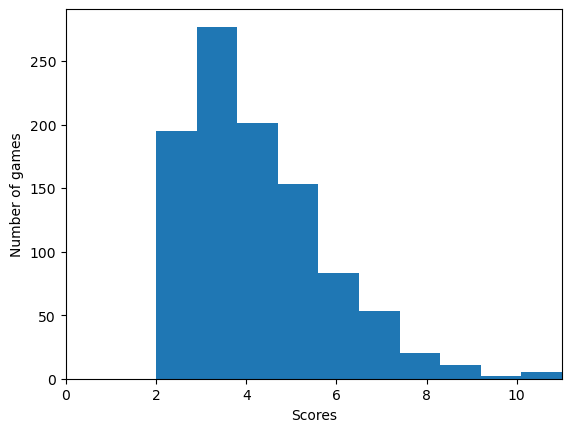

In [41]:
histogram_1d(scor, xlabel= "Scores")

In [42]:
display(Math(r'Mean\:score,\; \mu = \: {0} \\ Std\:Deviation,\; \sigma: {1}'.
             format(statistics.mean(scor), round(stdev(scor),3))))

<IPython.core.display.Math object>

In [43]:
list_xr, list_yr = concatenate(xsr), concatenate(ysr)

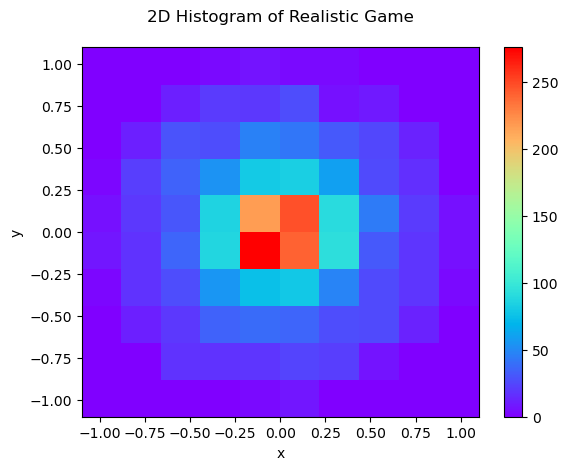

In [44]:
histogram_2D(list_xr, list_yr, n = 10, c="2D Histogram of Realistic Game\n")

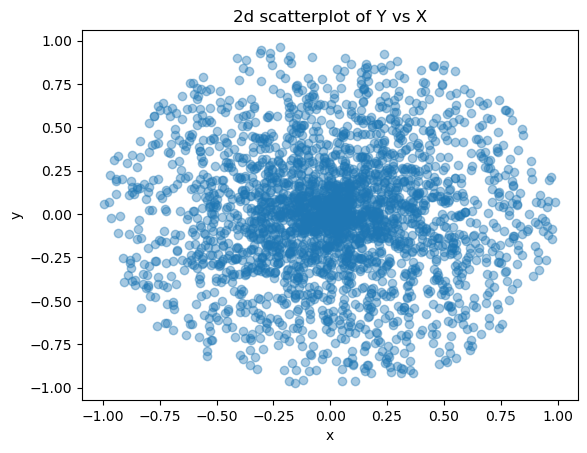

In [22]:
scatter_plot(list_xr, list_yr)